In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


file=pd.read_csv('QVI_data.csv')

In [6]:
file.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


In [4]:
file.describe()
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264834 non-null  int64  
 1   DATE              264834 non-null  object 
 2   STORE_NBR         264834 non-null  int64  
 3   TXN_ID            264834 non-null  int64  
 4   PROD_NBR          264834 non-null  int64  
 5   PROD_NAME         264834 non-null  object 
 6   PROD_QTY          264834 non-null  int64  
 7   TOT_SALES         264834 non-null  float64
 8   PACK_SIZE         264834 non-null  int64  
 9   BRAND             264834 non-null  object 
 10  LIFESTAGE         264834 non-null  object 
 11  PREMIUM_CUSTOMER  264834 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 24.2+ MB


In [5]:
file.iloc[2050]

LYLTY_CARD_NBR                                        3230
DATE                                            2018-07-02
STORE_NBR                                                3
TXN_ID                                                2102
PROD_NBR                                               102
PROD_NAME           Kettle Mozzarella   Basil & Pesto 175g
PROD_QTY                                                 2
TOT_SALES                                             10.8
PACK_SIZE                                              175
BRAND                                               KETTLE
LIFESTAGE                            OLDER SINGLES/COUPLES
PREMIUM_CUSTOMER                                Mainstream
Name: 2050, dtype: object

Compare trial stores to control stores that are similar-pre trial :
-  monthly overall sales revenue
-  monthly number of customers
-  monthly number of transactions per customer

In [12]:
file.iloc[77:88]

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
77,1071,2019-05-18,1,83,101,Doritos Salsa Medium 300g,1,2.6,300,DORITOS,YOUNG FAMILIES,Mainstream
78,1071,2019-01-19,1,82,60,Kettle Tortilla ChpsFeta&Garlic 150g,1,4.6,150,KETTLE,YOUNG FAMILIES,Mainstream
79,1072,2018-07-27,1,84,73,Smiths Crinkle Cut Salt & Vinegar 170g,2,5.8,170,SMITHS,NEW FAMILIES,Premium
80,1072,2019-04-04,1,85,95,Sunbites Whlegrn Crisps Frch/Onin 90g,1,1.7,90,SUNBITES,NEW FAMILIES,Premium
81,1074,2019-01-18,1,86,107,Smiths Crinkle Cut French OnionDip 150g,1,2.6,150,SMITHS,RETIREES,Budget
82,1076,2019-05-16,1,87,107,Smiths Crinkle Cut French OnionDip 150g,1,2.6,150,SMITHS,YOUNG SINGLES/COUPLES,Budget
83,1077,2019-05-16,1,88,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,4.6,150,KETTLE,OLDER SINGLES/COUPLES,Premium
84,1080,2018-11-30,1,89,111,Smiths Chip Thinly Cut Original 175g,1,3.0,175,SMITHS,RETIREES,Budget
85,1080,2019-02-28,1,90,83,WW D/Style Chip Sea Salt 200g,1,1.9,200,WOOLWORTHS,RETIREES,Budget
86,1080,2019-06-18,1,91,79,Smiths Chip Thinly CutSalt/Vinegr175g,1,3.0,175,SMITHS,RETIREES,Budget


In [18]:
file["DATE"]=pd.to_datetime(file["DATE"])
file["YEARMONTH"]=file["DATE"].dt.strftime("%Y%m").astype("int")
file["YEARMONTH"].head()

0    201810
1    201809
2    201903
3    201903
4    201811
Name: YEARMONTH, dtype: int32

Complie each month sale
- total sale
- number of customers 
- average transactions per customer
- average chips per customer 
- average price per unit


In [27]:
def monthly_trans():
    store_yrm_grp=file.groupby(["STORE_NBR","YEARMONTH"])
    total_sales=store_yrm_grp["TOT_SALES"].sum()
    num_customer=store_yrm_grp["LYLTY_CARD_NBR"].nunique()
    avr_tran_per_customer=store_yrm_grp.size()/num_customer
    avr_chips_per_customer=store_yrm_grp["PROD_QTY"].sum()/num_customer
    avr_chips_price=total_sales/store_yrm_grp["PROD_QTY"].sum()
    aggr=[total_sales,num_customer,avr_tran_per_customer,avr_chips_per_customer,avr_chips_price]
    metrics=pd.concat(aggr,axis=1)
    metrics.columns=["TOT_SALES","nCustomers","nTxnPerCust","nChipsPerCust","navgPricePerUnit"]
    return metrics

file_month_metrics=monthly_trans().reset_index()
file_month_metrics.head()

,STORE_NBR,YEARMONTH,TOT_SALES,nCustomers,nTxnPerCust,nChipsPerCust,navgPricePerUnit
0,1,201807,206.9,49,1.061224,1.265306,3.337097
1,1,201808,176.1,42,1.023810,1.285714,3.261111
2,1,201809,278.8,59,1.050847,1.271186,3.717333
3,1,201810,188.1,44,1.022727,1.318182,3.243103
4,1,201811,192.6,46,1.021739,1.239130,3.378947


This is fig shows, the relation between chips per customer and total sales

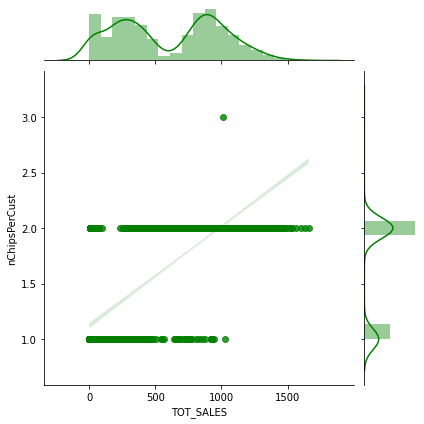

In [41]:
x=file_month_metrics["TOT_SALES"].astype("int")
y=file_month_metrics["nChipsPerCust"].astype("int")
sns.jointplot(x,y,color="g",kind="reg")
plt.savefig("regression plot for chips per customer and total sales")

Filtering only stores with full 12 months observation

In [42]:
obs_counts=file_month_metrics["STORE_NBR"].value_counts()
full_obs_index=obs_counts[obs_counts==12].index
full_obs=file_month_metrics[file_month_metrics["STORE_NBR"].isin(full_obs_index)]
pretrial_full_obs=full_obs[full_obs["YEARMONTH"]<201902]
pretrial_full_obs.head(10)

,STORE_NBR,YEARMONTH,TOT_SALES,nCustomers,nTxnPerCust,nChipsPerCust,navgPricePerUnit
0,1,201807,206.9,49,1.061224,1.265306,3.337097
1,1,201808,176.1,42,1.023810,1.285714,3.261111
2,1,201809,278.8,59,1.050847,1.271186,3.717333
3,1,201810,188.1,44,1.022727,1.318182,3.243103
4,1,201811,192.6,46,1.021739,1.239130,3.378947
5,1,201812,189.6,42,1.119048,1.357143,3.326316
6,1,201901,154.8,35,1.028571,1.200000,3.685714
12,2,201807,150.8,39,1.051282,1.179487,3.278261
13,2,201808,193.8,39,1.102564,1.410256,3.523636
14,2,201809,154.4,36,1.027778,1.138889,3.765854


In [52]:
def calCorrTable(metricCol,storeComparision,inputTable=pretrial_full_obs):
    cont_store_nbrs=inputTable[~inputTable["STORE_NBR"].isin([77,86,88])]["STORE_NBR"].unique()
    cors=pd.DataFrame(columns=["YEARMONTH","Trail_Str","Ctrl_Str","Corr_Score"])
    trail_store=inputTable[inputTable["STORE_NBR"]==storeComparision][metricCol].reset_index()
    for control in cont_store_nbrs:
        concat_file=pd.DataFrame(columns=["YEARMONTH","Trail_Str","Ctrl_Str","Corr_Score"])
        cont_store=inputTable[inputTable["STORE_NBR"]==control][metricCol].reset_index()
        concat_file["Corr_Score"]=trail_store.corrwith(cont_store,axis=1)
        concat_file["Trail_Str"]=storeComparision
        concat_file["Ctrl_Str"]=control
        concat_file["YEARMONTH"]=list(inputTable[inputTable["STORE_NBR"]==storeComparision]["YEARMONTH"])
        cors=pd.concat([cors,concat_file])
    return cors
corr_table = pd.DataFrame()
for trial_num in [77, 86, 88]:
    corr_table = pd.concat([corr_table, calCorrTable(["TOT_SALES", "nCustomers", "nTxnPerCust", "nChipsPerCust", "navgPricePerUnit"], trial_num)])
    
corr_table.head(8)

,YEARMONTH,Trail_Str,Ctrl_Str,Corr_Score
0,201807,77,1,0.070414
1,201808,77,1,0.027276
2,201809,77,1,0.002389
3,201810,77,1,-0.020045
4,201811,77,1,0.030024
5,201812,77,1,0.063946
6,201901,77,1,0.001470
0,201807,77,2,0.142957


In [66]:
def calMagnitudeDistance(metricCol,storeComparision,inputTable=pretrial_full_obs):
    cont_store_nbrs=inputTable[~inputTable["STORE_NBR"].isin([77,86,88])]["STORE_NBR"].unique()
    dists=pd.DataFrame()
    trail_store=inputTable[inputTable["STORE_NBR"]==storeComparision][metricCol]
    for count in cont_store_nbrs:
        concat_file=abs(inputTable[inputTable["STORE_NBR"]==storeComparision].reset_index()[metricCol]-inputTable[inputTable["STORE_NBR"]==count].reset_index()[metricCol])
        concat_file["YEARMONTH"]=list(inputTable[inputTable["STORE_NBR"]==storeComparision]["YEARMONTH"])
        concat_file["Trail_Str"]=storeComparision
        concat_file["Ctrl_Str"]=count
        dists=pd.concat([dists,concat_file])
    for col in metricCol:
        dists[col]=1-((dists[col]-dists[col].min())/(dists[col].max()-dists[col].min()))
    dists["magnitude"]=dists[metricCol].mean(axis=1)
    return dists

In [67]:
dist_tables=pd.DataFrame()
for trial_num in [77,86,89]:
    dist_tables=pd.concat([dist_tables,calMagnitudeDistance(["TOT_SALES", "nCustomers", "nTxnPerCust", "nChipsPerCust", "navgPricePerUnit"], trial_num)])
dist_tables.head(8)
dist_tables

,TOT_SALES,nCustomers,nTxnPerCust,nChipsPerCust,navgPricePerUnit,YEARMONTH,Trail_Str,Ctrl_Str,magnitude
0,0.935431,0.980769,0.958035,0.739412,0.883569,201807,77,1,0.899443
1,0.942972,0.951923,0.993823,0.802894,0.886328,201808,77,1,0.915588
2,0.961503,0.836538,0.992126,0.730041,0.703027,201809,77,1,0.844647
3,0.988221,0.932692,0.989514,0.940460,0.590528,201810,77,1,0.888283
4,0.962149,0.951923,0.874566,0.730358,0.832481,201811,77,1,0.870296
...,...,...,...,...,...,...,...,...,...
2,0.924387,0.925000,0.821712,0.453839,0.610170,201809,89,272,0.747022
3,0.889222,0.900000,0.711405,0.502447,0.465934,201810,89,272,0.693802
4,0.879371,0.983333,0.880589,0.545798,0.469723,201811,89,272,0.751763
5,0.819220,0.858333,0.844058,0.640436,0.369157,201812,89,272,0.706241


In [80]:
def combine_corr_dist(metricCol, storeComparision, inputTable=pretrial_full_obs):
    corrs = calCorrTable(metricCol, storeComparision, inputTable)
    dists = calMagnitudeDistance(metricCol, storeComparision, inputTable)
    dists = dists.drop(metricCol, axis=1)
    combine = pd.merge(corrs, dists, on=["YEARMONTH", "Trail_Str", "Ctrl_Str"])
    return combine

In [86]:
compare_metrics_table1=pd.DataFrame()
for trail_num in [77,86,88]:
    compare_metrics_table1=pd.concat([compare_metrics_table1,combine_corr_dist(["TOT_SALES"],trial_num)])

In [87]:
corr_weight=0.5
dist_weight=1-corr_weight

In [88]:
grouped_comparison_table1 = compare_metrics_table1.groupby(["Trail_Str", "Ctrl_Str"]).mean().reset_index()
grouped_comparison_table1["CompScore"] = (corr_weight * grouped_comparison_table1["Corr_Score"]) + (dist_weight * grouped_comparison_table1["magnitude"])
for trial_num in compare_metrics_table1["Trail_Str"].unique():
    print(grouped_comparison_table1[grouped_comparison_table1["Trail_Str"] == trial_num].sort_values(ascending=False, by="CompScore").head(), '\n')

     Trail_Str  Ctrl_Str  Corr_Score  magnitude  CompScore
80          89        89         1.0   1.000000   1.000000
120         89       131         1.0   0.979962   0.989981
165         89       176         1.0   0.974622   0.987311
70          89        74         1.0   0.974333   0.987166
174         89       185         1.0   0.973196   0.986598 



In [89]:
compare_metrics_table2 = pd.DataFrame()
for trial_num in [77, 86, 88]:
    compare_metrics_table2 = pd.concat([compare_metrics_table2, combine_corr_dist(["nCustomers"], trial_num)])

In [90]:
grouped_comparison_table2 = compare_metrics_table2.groupby(["Trail_Str", "Ctrl_Str"]).mean().reset_index()
grouped_comparison_table2["CompScore"] = (corr_weight * grouped_comparison_table2["Corr_Score"]) + (dist_weight * grouped_comparison_table2["magnitude"])
for trial_num in compare_metrics_table2["Trail_Str"].unique():
    print(grouped_comparison_table2[grouped_comparison_table2["Trail_Str"] == trial_num].sort_values(ascending=False, by="CompScore").head(), '\n')

     Trail_Str  Ctrl_Str  Corr_Score  magnitude  CompScore
218         77       233         1.0   0.993132   0.996566
38          77        41         1.0   0.976648   0.988324
101         77       111         1.0   0.968407   0.984203
105         77       115         1.0   0.967033   0.983516
15          77        17         1.0   0.965659   0.982830 

     Trail_Str  Ctrl_Str  Corr_Score  magnitude  CompScore
401         86       155         1.0   0.986772   0.993386
467         86       225         1.0   0.969577   0.984788
356         86       109         1.0   0.969577   0.984788
471         86       229         1.0   0.964286   0.982143
293         86        39         1.0   0.961640   0.980820 

     Trail_Str  Ctrl_Str  Corr_Score  magnitude  CompScore
736         88       237         1.0   0.987818   0.993909
705         88       203         1.0   0.944629   0.972315
551         88        40         1.0   0.942414   0.971207
668         88       165         1.0   0.935770   0.

In [92]:
for trial_num in compare_metrics_table2["Trail_Str"].unique():
    a = grouped_comparison_table1[grouped_comparison_table1["Trail_Str"] == trial_num].sort_values(ascending=False, by="CompScore").set_index(["Trail_Str", "Ctrl_Str"])["CompScore"]
    b = grouped_comparison_table2[grouped_comparison_table2["Trail_Str"] == trial_num].sort_values(ascending=False, by="CompScore").set_index(["Trail_Str", "Ctrl_Str"])["CompScore"]
    print((pd.concat([a,b], axis=1).sum(axis=1)/2).sort_values(ascending=False).head(3), '\n')

Trail_Str  Ctrl_Str
77         233         0.498283
           41          0.494162
           111         0.492102
dtype: float64 

Trail_Str  Ctrl_Str
86         155         0.496693
           225         0.492394
           109         0.492394
dtype: float64 

Trail_Str  Ctrl_Str
88         237         0.496955
           203         0.486157
           40          0.485604
dtype: float64 



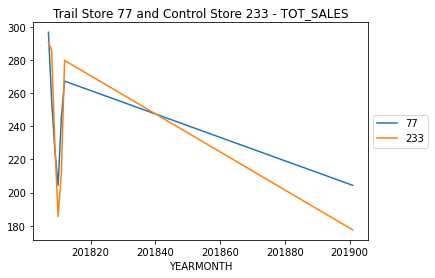

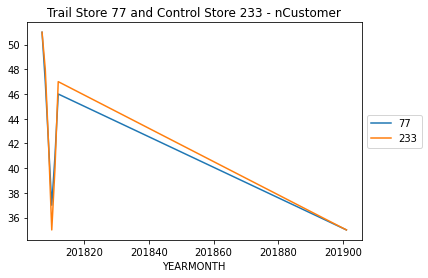

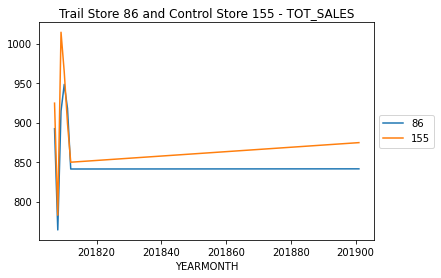

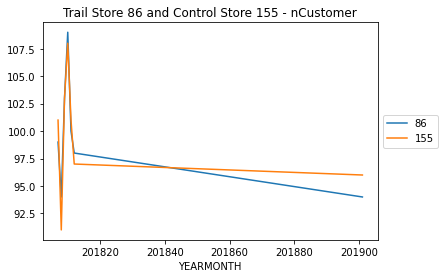

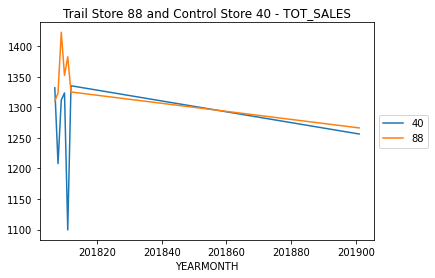

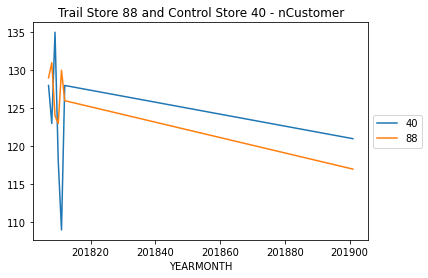

In [94]:
trial_control_dic = {77:233, 86:155, 88:40}
for key, val in trial_control_dic.items():
    pretrial_full_obs[pretrial_full_obs["STORE_NBR"].isin([key, val])].groupby(
        ["YEARMONTH", "STORE_NBR"]).sum()["TOT_SALES"].unstack().plot.line()
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.title("Trail Store "+str(key)+" and Control Store "+str(val)+" - TOT_SALES")
    plt.show()
    pretrial_full_obs[pretrial_full_obs["STORE_NBR"].isin([key, val])].groupby(
    ["YEARMONTH", "STORE_NBR"]).sum()["nCustomers"].unstack().plot.line()
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.title("Trail Store "+str(key)+" and Control Store "+str(val)+" - nCustomer")
    plt.show()
    print('\n')

In [95]:
sales_ratio_77 = pretrial_full_obs[pretrial_full_obs["STORE_NBR"] == 77]["TOT_SALES"].sum() / pretrial_full_obs[pretrial_full_obs["STORE_NBR"] == 233]["TOT_SALES"].sum()
sales_ratio_86 = pretrial_full_obs[pretrial_full_obs["STORE_NBR"] == 86]["TOT_SALES"].sum() / pretrial_full_obs[pretrial_full_obs["STORE_NBR"] == 155]["TOT_SALES"].sum()
sales_ratio_88 = pretrial_full_obs[pretrial_full_obs["STORE_NBR"] == 88]["TOT_SALES"].sum() / pretrial_full_obs[pretrial_full_obs["STORE_NBR"] == 40]["TOT_SALES"].sum()


In [99]:
trial_full_observ = full_obs[(full_obs["YEARMONTH"] >= 201902) & (full_obs["YEARMONTH"] <= 201904)]
scaled_sales_control_stores = full_obs[full_obs["STORE_NBR"].isin([233, 155, 40])][["STORE_NBR", "YEARMONTH", "TOT_SALES"]]

def scaler(row):
    if row["STORE_NBR"] == 233:
        return row["TOT_SALES"] * sales_ratio_77
    elif row["STORE_NBR"] == 155:
        return row["TOT_SALES"] * sales_ratio_86
    elif row["STORE_NBR"] == 40:
        return row["TOT_SALES"] * sales_ratio_88

scaled_sales_control_stores["ScaledSales"] = scaled_sales_control_stores.apply(lambda row: scaler(row), axis=1)

trial_scaled_sales_control_stores = scaled_sales_control_stores[(scaled_sales_control_stores["YEARMONTH"] >= 201902) & (scaled_sales_control_stores["YEARMONTH"] <= 201904)]
pretrial_scaled_sales_control_stores = scaled_sales_control_stores[scaled_sales_control_stores["YEARMONTH"] < 201902]

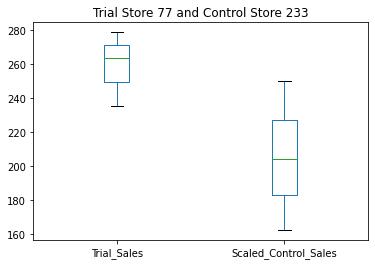

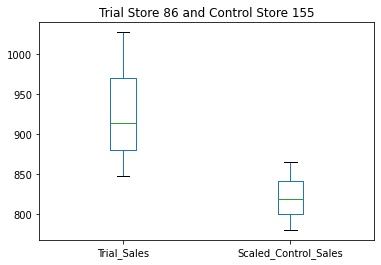

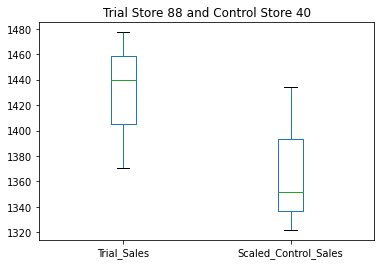

In [110]:
percentage_diff = {}

for trial, control in trial_control_dic.items():
    a = trial_scaled_sales_control_stores[trial_scaled_sales_control_stores["STORE_NBR"] == control]
    b = trial_full_observ[trial_full_observ["STORE_NBR"] == trial][["STORE_NBR", "YEARMONTH", "TOT_SALES"]]
    percentage_diff[trial] = b["TOT_SALES"].sum() / a["ScaledSales"].sum()
    b[["YEARMONTH", "TOT_SALES"]].merge(a[["YEARMONTH", "ScaledSales"]],on="YEARMONTH").set_index("YEARMONTH").rename(columns={"ScaledSales":"Scaled_Control_Sales", "TOT_SALES":"Trial_Sales"}).plot.box()
    plt.title("Trial Store "+str(trial)+" and Control Store "+str(control))
    

In [113]:
percentage_diff

{77: 1.2615468650086274, 86: 1.13150143573637, 88: 1.0434583458542188}